In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import sys
import sklearn.metrics

from sklearn.linear_model import LinearRegression

sys.path.append('../../globalfunction')  # setting path
import globalfunction.vv as vv  # importing

import numpy as np
import pandas as pd


#df_original = vv.dataset_modelling_version(iteration_code="0001_20220620")
#df_original = vv.dataset_modelling_version(iteration_code="0012_20220704")
df_original = vv.dataset_modelling_version(iteration_code="0013_20220704")
print(df_original.shape)
df_original.head(20)

/media/sf_shared_files/Springboard_III/capstone_prep/globalfunction/vv.py:283: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_json1 = pd.read_csv(LISTING_JSON_MODEL_FILE)  # EDIT 29-06-2022: There are bid listings and regular listings. I scrape them seporately and join them here.


remove duplicates: 29545/39200/33457/33921 ==> 29545/29694/29489/29498
type <class 'pandas.core.indexes.base.Index'>
Index(['Price', 'location.latitude', 'location.longitude',
       'distance_to_any_train', 'bedrooms_model', 'bathrooms_model',
       'analyticsProperty.imageCount', 'analyticsProperty.added',
       'floorplan_count', 'borough_name_Barking and Dagenham',
       'borough_name_Barnet', 'borough_name_Bexley', 'borough_name_Brent',
       'borough_name_Bromley', 'borough_name_Camden',
       'borough_name_City of London', 'borough_name_Croydon',
       'borough_name_Ealing', 'borough_name_Enfield', 'borough_name_Greenwich',
       'borough_name_Hackney', 'borough_name_Hammersmith and Fulham',
       'borough_name_Haringey', 'borough_name_Harrow', 'borough_name_Havering',
       'borough_name_Hillingdon', 'borough_name_Hounslow',
       'borough_name_Islington', 'borough_name_Kensington and Chelsea',
       'borough_name_Kingston upon Thames', 'borough_name_London (all)',
 

,Price,location.latitude,location.longitude,distance_to_any_train,bedrooms_model,bathrooms_model,analyticsProperty.imageCount,analyticsProperty.added,floorplan_count,borough_name_Barking and Dagenham,...,coarse_compass_direction_TN,coarse_compass_direction_TW,coarse_compass_direction_UB,coarse_compass_direction_W,coarse_compass_direction_WC,coarse_compass_direction_WD,tenure.tenureType_COMMONHOLD,tenure.tenureType_FREEHOLD,tenure.tenureType_LEASEHOLD,tenure.tenureType_SHARE_OF_FREEHOLD
ids,,,,,,,,,,,,,,,,,,,,,
121666838,470000.0,51.421556,-0.085360,0.2,3.0,1.0,14.0,20220329.0,4.0,0,...,0,0,0,0,0,0,0,0,1,0
124352288,435000.0,51.333260,-0.136320,0.5,2.0,2.0,6.0,20220627.0,16.0,0,...,0,0,0,0,0,0,0,0,0,1
124442261,435000.0,51.333260,-0.136320,0.5,2.0,2.0,5.0,20220628.0,16.0,0,...,0,0,0,0,0,0,0,0,0,1
123088685,440000.0,51.377899,-0.091704,0.2,2.0,2.0,19.0,20220505.0,4.0,0,...,0,0,0,0,0,0,0,0,1,0
121267037,440000.0,51.379063,-0.042351,1.0,3.0,2.0,10.0,20220318.0,4.0,0,...,0,0,0,0,0,0,0,0,1,0
123518627,440000.0,51.369100,-0.083860,0.4,2.0,2.0,8.0,20220520.0,4.0,0,...,0,0,0,0,0,0,0,0,0,1
124486775,440000.0,51.377420,-0.093470,0.2,2.0,2.0,11.0,20220629.0,9.0,0,...,0,0,0,0,0,0,0,0,1,0
122757659,440000.0,51.394844,-0.069912,0.3,2.0,1.0,13.0,20220425.0,1.0,0,...,0,0,0,0,0,0,0,1,0,0
98753948,440000.0,51.377831,-0.091873,0.2,2.0,2.0,13.0,20201021.0,4.0,0,...,0,0,0,0,0,0,0,0,1,0


In [22]:
df_original[
    #['Address', 'analyticsProperty.maxSizeAc', 'analyticsProperty.maxSizeFt', 'analyticsProperty.minSizeAc', 'analyticsProperty.minSizeFt', 'date_scraped', 'date_scraped_model',     'date_scraped_model', 'date_scraped_meta']]
    #df['location.latitude'].notnull()]
    df_original['location.latitude'].isnull()]

,Price,location.latitude,location.longitude,distance_to_any_train,bedrooms_model,bathrooms_model,analyticsProperty.imageCount,analyticsProperty.added,floorplan_count,borough_name_Barking and Dagenham,...,coarse_compass_direction_TN,coarse_compass_direction_TW,coarse_compass_direction_UB,coarse_compass_direction_W,coarse_compass_direction_WC,coarse_compass_direction_WD,tenure.tenureType_COMMONHOLD,tenure.tenureType_FREEHOLD,tenure.tenureType_LEASEHOLD,tenure.tenureType_SHARE_OF_FREEHOLD
ids,,,,,,,,,,,,,,,,,,,,,


In [23]:
sample_incomplete_rows = df_original[df_original.isnull().any(axis=1)].head()
sample_incomplete_rows

,Price,location.latitude,location.longitude,distance_to_any_train,bedrooms_model,bathrooms_model,analyticsProperty.imageCount,analyticsProperty.added,floorplan_count,borough_name_Barking and Dagenham,...,coarse_compass_direction_TN,coarse_compass_direction_TW,coarse_compass_direction_UB,coarse_compass_direction_W,coarse_compass_direction_WC,coarse_compass_direction_WD,tenure.tenureType_COMMONHOLD,tenure.tenureType_FREEHOLD,tenure.tenureType_LEASEHOLD,tenure.tenureType_SHARE_OF_FREEHOLD
ids,,,,,,,,,,,,,,,,,,,,,
80138421,425000.0,51.376435,-0.084635,0.1,3.0,1.0,NaN,NaN,4.0,0,...,0,0,0,0,0,0,0,1,0,0
96576997,400000.0,51.343284,-0.139142,1.0,2.0,2.0,NaN,NaN,4.0,0,...,0,0,0,0,0,0,0,0,1,0
124004333,400000.0,51.505680,-0.335640,0.4,NaN,1.0,15.0,20220617.0,4.0,0,...,0,0,0,1,0,0,0,0,1,0
122145023,375000.0,51.511062,-0.319344,0.2,NaN,1.0,5.0,20220408.0,4.0,0,...,0,0,0,1,0,0,0,0,0,0
122146472,375000.0,51.511020,-0.319358,0.2,NaN,1.0,5.0,20220408.0,4.0,0,...,0,0,0,1,0,0,0,0,1,0


In [24]:
sample_incomplete_rows = df_original[df_original.isnull().any(axis=1)].head()
sample_incomplete_rows

,Price,location.latitude,location.longitude,distance_to_any_train,bedrooms_model,bathrooms_model,analyticsProperty.imageCount,analyticsProperty.added,floorplan_count,borough_name_Barking and Dagenham,...,coarse_compass_direction_TN,coarse_compass_direction_TW,coarse_compass_direction_UB,coarse_compass_direction_W,coarse_compass_direction_WC,coarse_compass_direction_WD,tenure.tenureType_COMMONHOLD,tenure.tenureType_FREEHOLD,tenure.tenureType_LEASEHOLD,tenure.tenureType_SHARE_OF_FREEHOLD
ids,,,,,,,,,,,,,,,,,,,,,
80138421,425000.0,51.376435,-0.084635,0.1,3.0,1.0,NaN,NaN,4.0,0,...,0,0,0,0,0,0,0,1,0,0
96576997,400000.0,51.343284,-0.139142,1.0,2.0,2.0,NaN,NaN,4.0,0,...,0,0,0,0,0,0,0,0,1,0
124004333,400000.0,51.505680,-0.335640,0.4,NaN,1.0,15.0,20220617.0,4.0,0,...,0,0,0,1,0,0,0,0,1,0
122145023,375000.0,51.511062,-0.319344,0.2,NaN,1.0,5.0,20220408.0,4.0,0,...,0,0,0,1,0,0,0,0,0,0
122146472,375000.0,51.511020,-0.319358,0.2,NaN,1.0,5.0,20220408.0,4.0,0,...,0,0,0,1,0,0,0,0,1,0


In [25]:
df_original = df_original[~df_original.isnull().any(axis=1)]

In [26]:
sample_incomplete_rows = df_original[df_original.isnull().any(axis=1)].head()
sample_incomplete_rows

,Price,location.latitude,location.longitude,distance_to_any_train,bedrooms_model,bathrooms_model,analyticsProperty.imageCount,analyticsProperty.added,floorplan_count,borough_name_Barking and Dagenham,...,coarse_compass_direction_TN,coarse_compass_direction_TW,coarse_compass_direction_UB,coarse_compass_direction_W,coarse_compass_direction_WC,coarse_compass_direction_WD,tenure.tenureType_COMMONHOLD,tenure.tenureType_FREEHOLD,tenure.tenureType_LEASEHOLD,tenure.tenureType_SHARE_OF_FREEHOLD
ids,,,,,,,,,,,,,,,,,,,,,


In [27]:
print(df_original.shape)
df_original['bedrooms_model'] = df_original['bedrooms_model'].fillna(-1)
df_original['bathrooms_model'] = df_original['bathrooms_model'].fillna(-1)
# df_original['Price'] = pd.to_numeric(df_original['Price'], 'coerce').dropna().astype(int)
# df_original = df_original[df_original['Price'].notna()]
print(df_original.shape)
df_original

(24554, 99)
(24554, 99)


,Price,location.latitude,location.longitude,distance_to_any_train,bedrooms_model,bathrooms_model,analyticsProperty.imageCount,analyticsProperty.added,floorplan_count,borough_name_Barking and Dagenham,...,coarse_compass_direction_TN,coarse_compass_direction_TW,coarse_compass_direction_UB,coarse_compass_direction_W,coarse_compass_direction_WC,coarse_compass_direction_WD,tenure.tenureType_COMMONHOLD,tenure.tenureType_FREEHOLD,tenure.tenureType_LEASEHOLD,tenure.tenureType_SHARE_OF_FREEHOLD
ids,,,,,,,,,,,,,,,,,,,,,
121666838,470000.0,51.421556,-0.085360,0.2,3.0,1.0,14.0,20220329.0,4.0,0,...,0,0,0,0,0,0,0,0,1,0
124352288,435000.0,51.333260,-0.136320,0.5,2.0,2.0,6.0,20220627.0,16.0,0,...,0,0,0,0,0,0,0,0,0,1
124442261,435000.0,51.333260,-0.136320,0.5,2.0,2.0,5.0,20220628.0,16.0,0,...,0,0,0,0,0,0,0,0,0,1
123088685,440000.0,51.377899,-0.091704,0.2,2.0,2.0,19.0,20220505.0,4.0,0,...,0,0,0,0,0,0,0,0,1,0
121267037,440000.0,51.379063,-0.042351,1.0,3.0,2.0,10.0,20220318.0,4.0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96649387,500000.0,51.400110,-0.167100,0.3,2.0,1.0,10.0,20220530.0,4.0,0,...,0,0,0,0,0,0,0,0,1,0
96649792,565000.0,51.354721,-0.183850,0.5,2.0,2.0,12.0,20220530.0,4.0,0,...,0,0,0,0,0,0,0,0,0,0
96650707,485000.0,51.454612,-0.233345,0.9,4.0,1.0,1.0,20220530.0,5.0,0,...,0,0,0,0,0,0,0,1,0,0


In [28]:
y = df_original['Price']
X = df_original.drop(['Price'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [29]:
df_original[df_original['Price'].isna()]
#y[y['Price'].isna()]
y.dtype
type(y)
y[y.isna()]

Series([], Name: Price, dtype: float64)

In [30]:
tree_reg = DecisionTreeRegressor(max_depth=12)
#tree_reg.fit(X, y)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=12)

In [31]:
from sklearn.tree import export_graphviz

In [32]:
export_graphviz(tree_reg,
                out_file="property_price-05.dot",
                feature_names=X.columns,
                class_names='Price',
                rounded=True,
                filled=True)

# dot -Tpng property_price-05.dot -o property_price-03.png

In [33]:
tree_reg.score(X_test,y_test)

0.5382526252478915

In [34]:
#print(tree_reg.feature_names_in_)
#print(tree_reg.feature_importances_)
pd.DataFrame(tree_reg.feature_importances_,tree_reg.feature_names_in_).sort_values(by=0,ascending=False)

,0
bedrooms_model,2.987362e-01
location.longitude,1.746402e-01
location.latitude,1.326185e-01
tenure.tenureType_LEASEHOLD,4.211488e-02
coarse_compass_direction_W,3.675451e-02
coarse_compass_direction_SW,3.383441e-02
analyticsProperty.imageCount,3.077754e-02
analyticsProperty.propertyType_Flats / Apartments,2.751575e-02
bathrooms_model,2.583980e-02
borough_name_Hackney,2.352333e-02


In [35]:
sorted(zip(tree_reg.feature_importances_,tree_reg.feature_names_in_),reverse=True)

[(0.2987361879483246, 'bedrooms_model'),
 (0.17464023063298215, 'location.longitude'),
 (0.13261853284368055, 'location.latitude'),
 (0.04211487557904377, 'tenure.tenureType_LEASEHOLD'),
 (0.03675451196764176, 'coarse_compass_direction_W'),
 (0.03383441118127984, 'coarse_compass_direction_SW'),
 (0.03077754381792745, 'analyticsProperty.imageCount'),
 (0.027515749871438153, 'analyticsProperty.propertyType_Flats / Apartments'),
 (0.025839801413290748, 'bathrooms_model'),
 (0.023523326826454284, 'borough_name_Hackney'),
 (0.021520156747564544, 'analyticsProperty.added'),
 (0.016675877615874492, 'borough_name_Tower Hamlets'),
 (0.01650284924753098, 'coarse_compass_direction_NW'),
 (0.015756161646895167, 'coarse_compass_direction_N'),
 (0.011343831529901873, 'distance_to_any_train'),
 (0.009572275920930006, 'borough_name_Croydon'),
 (0.008749791668020025, 'coarse_compass_direction_RM'),
 (0.008561125560065214, 'propertySubType_Hotel Room'),
 (0.007166333086534177, 'borough_name_Greenwich'),

In [36]:
from sklearn.metrics import mean_squared_error



In [37]:
import numpy as np

from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, X, y,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [107520.31017181 143840.1451935  103825.7706965  122435.07020166
 101048.73820639  96612.73147421 113729.15114933 125175.26948384
 102926.58857157 136696.7358298 ]
Mean: 115381.05109786
Standard deviation: 15234.131183886504


In [38]:
y_pred = tree_reg.predict(X_test)
true_vs_pred = pd.DataFrame(sorted(zip(y_test, y_pred), reverse=True))
true_vs_pred

,0,1
0,600000.0,600000.000000
1,600000.0,600000.000000
2,600000.0,600000.000000
3,600000.0,600000.000000
4,600000.0,600000.000000
...,...,...
6134,100000.0,277298.133713
6135,100000.0,231721.564576
6136,100000.0,160000.000000
6137,98750.0,451531.805556


In [39]:
sklearn.metrics.mean_squared_error(y_test, y_pred)

6198541522.516583

<AxesSubplot:xlabel='0', ylabel='1'>

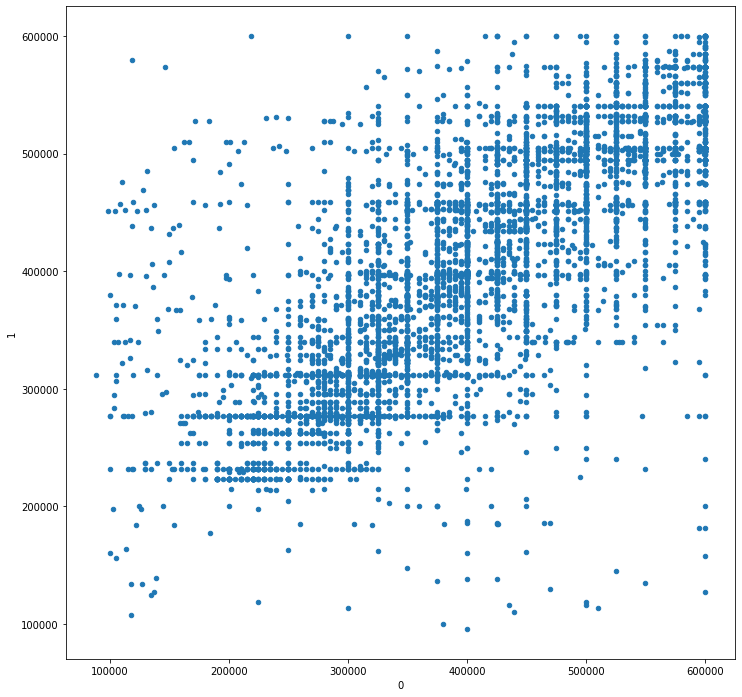

In [40]:
true_vs_pred.plot(kind='scatter',x=0,y=1,figsize=(12,12))